In [159]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shp 파일 시각화

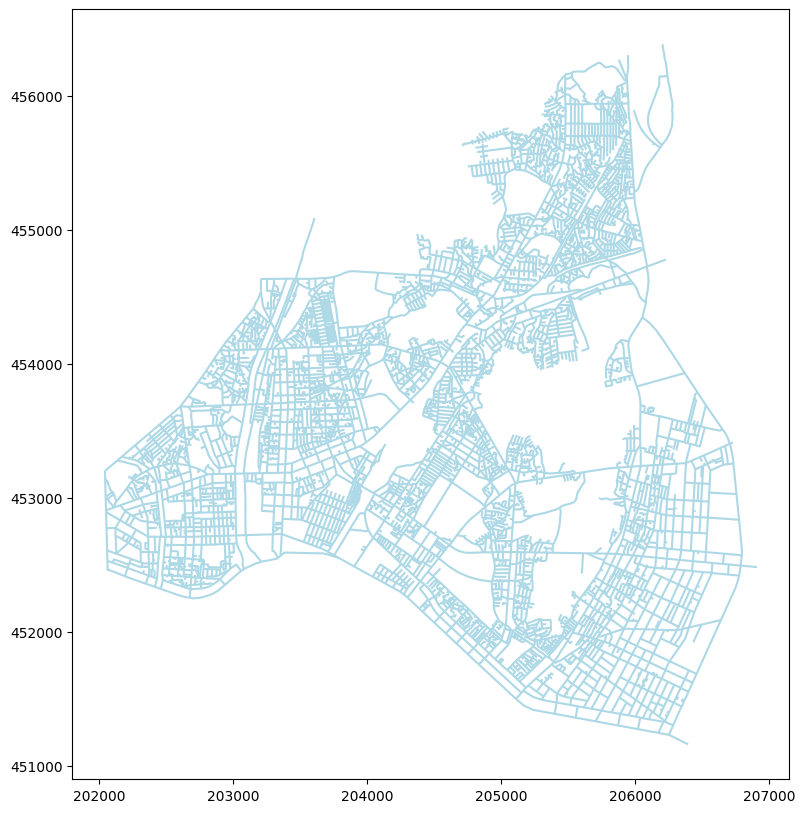

In [160]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## 유흥주점

In [161]:
# 유흥 주점 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "유흥주점영업.csv"
adult_entertainment = pd.read_csv(f"{dir_path}/{file_name}", encoding='cp949', low_memory=False)

In [162]:
adult_entertainment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53110 entries, 0 to 53109
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           53110 non-null  int64  
 1   개방서비스명       53110 non-null  object 
 2   개방서비스아이디     53110 non-null  object 
 3   개방자치단체코드     53110 non-null  int64  
 4   관리번호         53110 non-null  object 
 5   인허가일자        53109 non-null  object 
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     53110 non-null  int64  
 8   영업상태명        53110 non-null  object 
 9   상세영업상태코드     53110 non-null  int64  
 10  상세영업상태명      53110 non-null  object 
 11  폐업일자         27185 non-null  object 
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        38958 non-null  object 
 16  소재지면적        50596 non-null  float64
 17  소재지우편번호      46455 non-null  object 
 18  소재지전체주소      53043 non-null  object 
 19  도로명전

In [163]:
# 소재지전체주소 칼럼에서 "서울특별시 동대문구"를 포함한 데이터 필터링
adult_entertainment = adult_entertainment[adult_entertainment['소재지전체주소'].str.contains('서울특별시 동대문구', na=False)]


In [164]:
# 영업상태구분코드 고유값 확인
unique_values = adult_entertainment['영업상태구분코드'].unique()

# 고유값 출력
print(unique_values)

[1 3]


In [165]:
# 영업상태구분코드가 3인 데이터 필터링
status_code_3 = adult_entertainment[adult_entertainment['영업상태구분코드'] == 3]

# 결과 확인
print(status_code_3)


          번호  개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호  \
28425  28426  유흥주점영업  07_23_02_P   3050000  3050000-102-2019-00001   
28429  28430  유흥주점영업  07_23_02_P   3050000  3050000-102-2019-00002   
37000  37001  유흥주점영업  07_23_02_P   3050000  3050000-102-2019-00004   
38576  38577  유흥주점영업  07_23_02_P   3050000  3050000-102-1999-11406   
38577  38578  유흥주점영업  07_23_02_P   3050000  3050000-102-1999-11407   
...      ...     ...         ...       ...                     ...   
38780  38781  유흥주점영업  07_23_02_P   3050000  3050000-102-1973-08510   
38781  38782  유흥주점영업  07_23_02_P   3050000  3050000-102-1973-08468   
38782  38783  유흥주점영업  07_23_02_P   3050000  3050000-102-1974-08445   
38783  38784  유흥주점영업  07_23_02_P   3050000  3050000-102-1975-08424   
38784  38785  유흥주점영업  07_23_02_P   3050000  3050000-102-1976-08426   

            인허가일자  인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장생산직직원수 건물소유구분명  \
28425  2019-02-08      NaN         3    폐업         2  ...      NaN     NaN   
284

In [166]:
# 영업상태구분코드가 3이 아닌 데이터만 필터링(영업 중인 데이터만 필터링)
adult_entertainment = adult_entertainment[adult_entertainment['영업상태구분코드'] != 3]

# 필요한 칼럼만 선택하고 칼럼 이름 변경
adult_entertainment = adult_entertainment[['개방서비스명', '소재지전체주소', '좌표정보(x)', '좌표정보(y)']].rename(columns={'좌표정보(x)': 'x', '좌표정보(y)': 'y'})


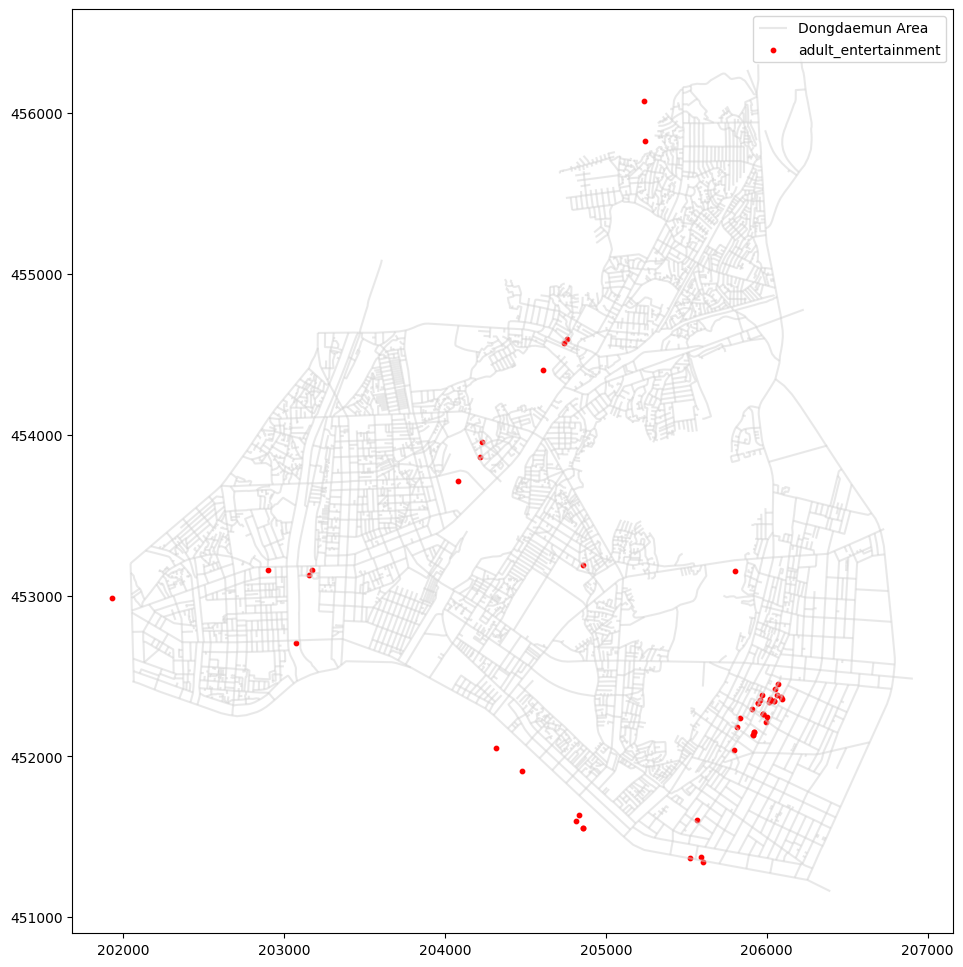

In [167]:
# 유흥주점 데이터를 GeoDataFrame으로 변환 (EPSG:2097)
geometry = [Point(xy) for xy in zip(adult_entertainment['x'], adult_entertainment['y'])]
adult_entertainment_geo = gpd.GeoDataFrame(adult_entertainment, geometry=geometry, crs="EPSG:2097")

# 유흥주점 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
adult_entertainment_geo = adult_entertainment_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 유흥주점 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
adult_entertainment_geo.plot(ax=ax, color='red', markersize=10, label='adult_entertainment')
plt.legend()
plt.show()

In [168]:
adult_entertainment_geo = adult_entertainment_geo.to_crs("EPSG:4326")

adult_entertainment_geo['x'] = adult_entertainment_geo.geometry.x
adult_entertainment_geo['y'] = adult_entertainment_geo.geometry.y

adult_entertainment_geo = adult_entertainment_geo.drop(columns='geometry')

output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/유흥주점.csv"
adult_entertainment_geo.to_csv(output_path, index=False, encoding='utf-8-sig')

## 단란주점

In [169]:
# 유흥 주점 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "단란주점영업.csv"
adult_karaoke = pd.read_csv(f"{dir_path}/{file_name}", encoding='cp949', low_memory=False)

In [170]:
adult_karaoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41247 entries, 0 to 41246
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           41247 non-null  int64  
 1   개방서비스명       41247 non-null  object 
 2   개방서비스아이디     41247 non-null  object 
 3   개방자치단체코드     41247 non-null  int64  
 4   관리번호         41247 non-null  object 
 5   인허가일자        41247 non-null  object 
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     41247 non-null  int64  
 8   영업상태명        41247 non-null  object 
 9   상세영업상태코드     41247 non-null  int64  
 10  상세영업상태명      41247 non-null  object 
 11  폐업일자         29243 non-null  object 
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        31495 non-null  object 
 16  소재지면적        37303 non-null  float64
 17  소재지우편번호      37112 non-null  object 
 18  소재지전체주소      41206 non-null  object 
 19  도로명전

In [171]:
# 소재지전체주소 칼럼에서 "서울특별시 동대문구"를 포함한 데이터 필터링
adult_karaoke = adult_karaoke[adult_karaoke['소재지전체주소'].str.contains('서울특별시 동대문구', na=False)]

In [172]:
# 영업상태구분코드 고유값 확인
unique_values = adult_karaoke['영업상태구분코드'].unique()

# 고유값 출력
print(unique_values)

[1 3]


In [173]:
# 영업상태구분코드가 3인 데이터 필터링
status_code_3 = adult_karaoke[adult_karaoke['영업상태구분코드'] == 3]

In [174]:
# 영업상태구분코드가 3이 아닌 데이터만 필터링(영업 중인 데이터만 필터링)
adult_karaoke = adult_karaoke[adult_karaoke['영업상태구분코드'] != 3]

# 필요한 칼럼만 선택하고 칼럼 이름 변경
adult_karaoke = adult_karaoke[['개방서비스명', '소재지전체주소', '좌표정보(x)', '좌표정보(y)']].rename(columns={'좌표정보(x)': 'x', '좌표정보(y)': 'y'})

adult_karaoke.head()


,개방서비스명,소재지전체주소,x,y
6258,단란주점영업,서울특별시 동대문구 장안동 365-1 (2층),206143.713445,451918.270046
6297,단란주점영업,서울특별시 동대문구 청량리동 705-1번지 지하1층,203829.921168,453363.888499
6298,단란주점영업,서울특별시 동대문구 장안동 543 (한천로 142),205848.001836,452357.757891
6299,단란주점영업,서울특별시 동대문구 장안동 345-2 지하1층,206269.105764,452025.055903
6304,단란주점영업,서울특별시 동대문구 장안동 463-4,205770.500180,451105.459249


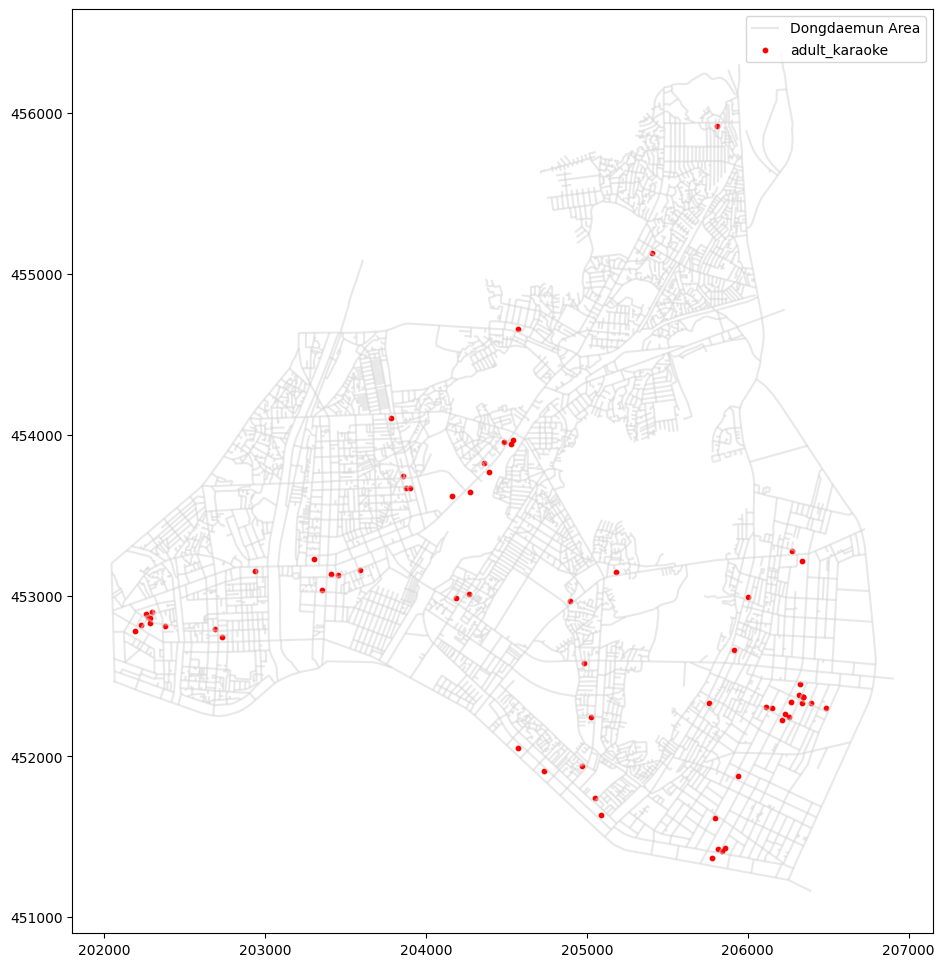

In [175]:
# 단란주점 데이터를 GeoDataFrame으로 변환 (EPSG:5174)
geometry = [Point(xy) for xy in zip(adult_karaoke['x'], adult_karaoke['y'])]
adult_karaoke_geo = gpd.GeoDataFrame(adult_karaoke, geometry=geometry, crs="EPSG:5174")

# 유흥주점 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
adult_karaoke_geo = adult_karaoke_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 유흥주점 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
adult_karaoke_geo.plot(ax=ax, color='red', markersize=10, label='adult_karaoke')
plt.legend()
plt.show()

In [176]:
adult_karaoke_geo = adult_karaoke_geo.to_crs("EPSG:4326")

adult_karaoke_geo['x'] = adult_karaoke_geo.geometry.x
adult_karaoke_geo['y'] = adult_karaoke_geo.geometry.y

adult_karaoke_geo = adult_karaoke_geo.drop(columns='geometry')

output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/단란주점.csv"
adult_karaoke_geo.to_csv(output_path, index=False, encoding='utf-8-sig')

## 취객데이터(유흥주점 + 단란주점)

In [177]:
# 두 데이터프레임 위아래로 합치기
combined_data = pd.concat([adult_entertainment_geo, adult_karaoke_geo], ignore_index=True)

# 결과 확인
print(combined_data)


     개방서비스명                      소재지전체주소           x          y
0    유흥주점영업         서울특별시 동대문구 장안동 366-2  127.068435  37.570641
1    유흥주점영업         서울특별시 동대문구 장안동 372-4  127.067327  37.570509
2    유흥주점영업   서울특별시 동대문구 장안동 366-2 지하 1층  127.068435  37.570641
3    유흥주점영업         서울특별시 동대문구 장안동 372-3  127.067449  37.570699
4    유흥주점영업        서울특별시 동대문구 휘경동 321-25  127.053841  37.590907
..      ...                          ...         ...        ...
112  단란주점영업      서울특별시 동대문구 답십리동 961-9번지  127.057590  37.564253
113  단란주점영업         서울특별시 동대문구 장안동 342-6  127.072381  37.570513
114  단란주점영업    서울특별시 동대문구 장안동 344-9 삼우빌딩  127.071827  37.570843
115  단란주점영업  서울특별시 동대문구 장안동 366-9번지 지하1층  127.070793  37.569705
116  단란주점영업       서울특별시 동대문구 전농동 602-9번지  127.051262  37.585037

[117 rows x 4 columns]


In [178]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/취객데이터.csv"
combined_data.to_csv(output_path, index=False, encoding='utf-8-sig')

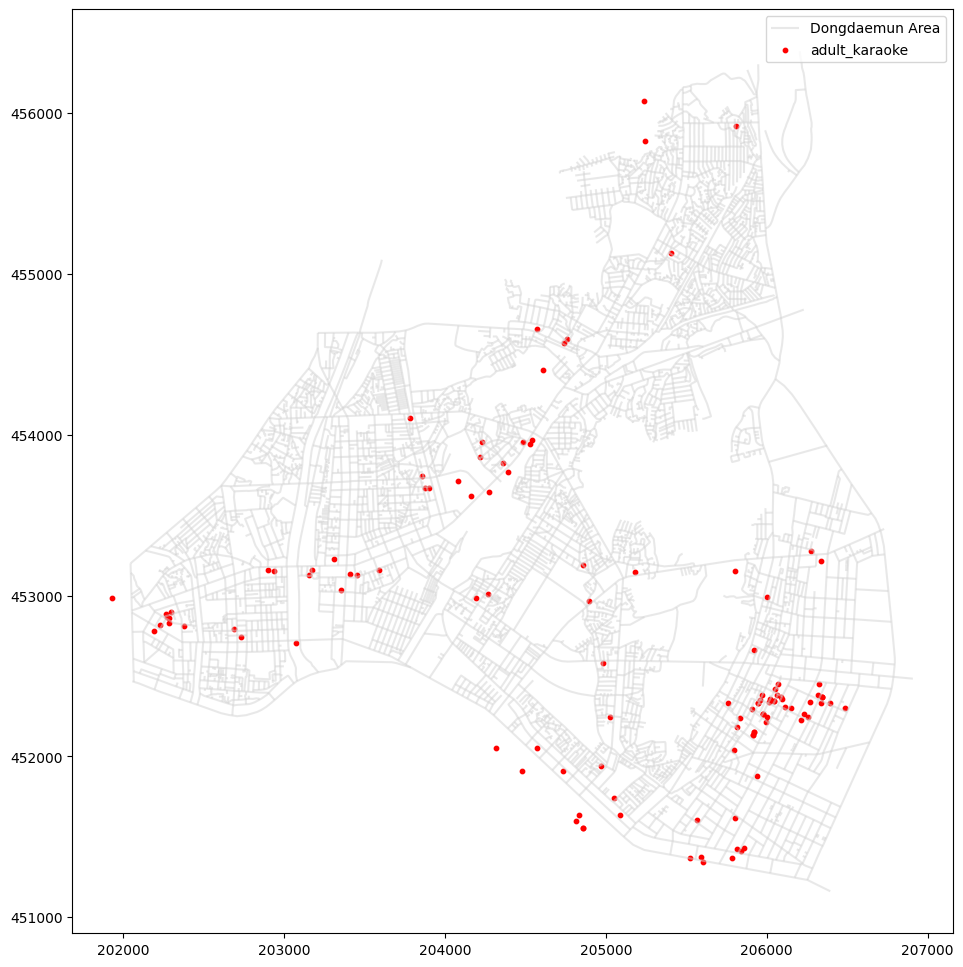

In [179]:
# 단란주점 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(combined_data['x'], combined_data['y'])]
combined_data_geo = gpd.GeoDataFrame(combined_data, geometry=geometry, crs="EPSG:4326")

# 유흥주점 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
combined_data_geo = combined_data_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 유흥주점 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
combined_data_geo.plot(ax=ax, color='red', markersize=10, label='adult_karaoke')
plt.legend()
plt.show()